In [1]:
%%capture install_xgboost
!pip install xgboost

In [54]:
from data_preparation import Preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

In [3]:
warnings.filterwarnings('ignore')

## Processing data

In [31]:
#creating an object of the data preparation/cleaning class
prep = Preparation()

In [32]:
#reading the april dataset
df_april = pd.read_csv("COVIDiSTRESS_April_27_clean.csv", encoding= 'unicode_escape')
df_april = prep.clean(df_april)
df_april = prep.selection_alteration(df_april)
df_april = prep.scaling(df_april)

In [34]:
#reading the may dataset
df_may = pd.read_csv("COVIDiSTRESS_May_30_cleaned.csv", encoding= 'unicode_escape')
df_may = prep.clean(df_may)
df_may = prep.selection_alteration(df_may)
df_may = prep.scaling(df_may)

In [36]:
#combining the april and may dataset
df = pd.concat([df_april, df_may])

In [38]:
df.to_csv('COVIDiSTRESS_April_May_Combined.csv')

In [39]:
#target value - average stress
y = df["PSS10_avg"].to_numpy().reshape(-1, 1)

In [40]:
#predictors/features
x = df.drop("PSS10_avg", axis="columns")

In [41]:
#saving feature names - to be used in the important features visualization later
feature_names = [col for col in x.columns]

In [42]:
x = x.to_numpy()

In [43]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.02)

In [44]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

## Training XGBoost Regressor

In [46]:
#randomized search - hyper-parameter tuning
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), 
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, scoring='neg_mean_squared_error', cv=kfold, verbose=3, return_train_score=True)

search.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END colsample_bytree=0.7110788440697235, gamma=0.11802062563557009, learning_rate=0.11316641740855919, max_depth=2, n_estimators=121, subsample=0.6639497606132876;, score=(train=-0.011, test=-0.011) total time=   2.5s
[CV 2/3] END colsample_bytree=0.7110788440697235, gamma=0.11802062563557009, learning_rate=0.11316641740855919, max_depth=2, n_estimators=121, subsample=0.6639497606132876;, score=(train=-0.011, test=-0.011) total time=   2.4s
[CV 3/3] END colsample_bytree=0.7110788440697235, gamma=0.11802062563557009, learning_rate=0.11316641740855919, max_depth=2, n_estimators=121, subsample=0.6639497606132876;, score=(train=-0.011, test=-0.011) total time=   2.3s
[CV 1/3] END colsample_bytree=0.9368133393437632, gamma=0.37681243307157486, learning_rate=0.2446800266881921, max_depth=5, n_estimators=109, subsample=0.8496453384589885;, score=(train=-0.010, test=-0.010) total time=   5.6s
[CV 2/3] END colsample_bytree=

[CV 1/3] END colsample_bytree=0.8313200223316509, gamma=0.27560751770473796, learning_rate=0.20202844569484102, max_depth=3, n_estimators=102, subsample=0.6821069807899443;, score=(train=-0.010, test=-0.010) total time=   2.9s
[CV 2/3] END colsample_bytree=0.8313200223316509, gamma=0.27560751770473796, learning_rate=0.20202844569484102, max_depth=3, n_estimators=102, subsample=0.6821069807899443;, score=(train=-0.010, test=-0.010) total time=   3.6s
[CV 3/3] END colsample_bytree=0.8313200223316509, gamma=0.27560751770473796, learning_rate=0.20202844569484102, max_depth=3, n_estimators=102, subsample=0.6821069807899443;, score=(train=-0.010, test=-0.010) total time=   3.1s
[CV 1/3] END colsample_bytree=0.8206795045490947, gamma=0.44926459953875114, learning_rate=0.13576236563722527, max_depth=4, n_estimators=104, subsample=0.7731119660091088;, score=(train=-0.010, test=-0.010) total time=   3.6s
[CV 2/3] END colsample_bytree=0.8206795045490947, gamma=0.44926459953875114, learning_rate=0

[CV 2/3] END colsample_bytree=0.8691355501003972, gamma=0.25215939235247903, learning_rate=0.299629876381445, max_depth=2, n_estimators=121, subsample=0.9963285651983094;, score=(train=-0.010, test=-0.010) total time=   2.3s
[CV 3/3] END colsample_bytree=0.8691355501003972, gamma=0.25215939235247903, learning_rate=0.299629876381445, max_depth=2, n_estimators=121, subsample=0.9963285651983094;, score=(train=-0.010, test=-0.011) total time=   2.4s
[CV 1/3] END colsample_bytree=0.7990629618209542, gamma=0.24894566255039147, learning_rate=0.3080333863474767, max_depth=4, n_estimators=125, subsample=0.671858593730186;, score=(train=-0.010, test=-0.010) total time=   4.4s
[CV 2/3] END colsample_bytree=0.7990629618209542, gamma=0.24894566255039147, learning_rate=0.3080333863474767, max_depth=4, n_estimators=125, subsample=0.671858593730186;, score=(train=-0.010, test=-0.010) total time=   4.6s
[CV 3/3] END colsample_bytree=0.7990629618209542, gamma=0.24894566255039147, learning_rate=0.3080333

[CV 3/3] END colsample_bytree=0.9487298324052219, gamma=0.10104150029000941, learning_rate=0.09024197344407371, max_depth=3, n_estimators=117, subsample=0.9473589170196125;, score=(train=-0.010, test=-0.010) total time=   3.2s
[CV 1/3] END colsample_bytree=0.7819389937041298, gamma=0.15481851611153297, learning_rate=0.10954879134637012, max_depth=2, n_estimators=121, subsample=0.8663331545865294;, score=(train=-0.011, test=-0.011) total time=   2.3s
[CV 2/3] END colsample_bytree=0.7819389937041298, gamma=0.15481851611153297, learning_rate=0.10954879134637012, max_depth=2, n_estimators=121, subsample=0.8663331545865294;, score=(train=-0.011, test=-0.011) total time=   2.3s
[CV 3/3] END colsample_bytree=0.7819389937041298, gamma=0.15481851611153297, learning_rate=0.10954879134637012, max_depth=2, n_estimators=121, subsample=0.8663331545865294;, score=(train=-0.011, test=-0.011) total time=   2.3s
[CV 1/3] END colsample_bytree=0.8105964045992475, gamma=0.07495087263247552, learning_rate=0

[CV 1/3] END colsample_bytree=0.776282505339983, gamma=0.10751118350776218, learning_rate=0.10240721663706474, max_depth=5, n_estimators=123, subsample=0.9178241513896627;, score=(train=-0.009, test=-0.010) total time=   5.4s
[CV 2/3] END colsample_bytree=0.776282505339983, gamma=0.10751118350776218, learning_rate=0.10240721663706474, max_depth=5, n_estimators=123, subsample=0.9178241513896627;, score=(train=-0.010, test=-0.010) total time=   5.2s
[CV 3/3] END colsample_bytree=0.776282505339983, gamma=0.10751118350776218, learning_rate=0.10240721663706474, max_depth=5, n_estimators=123, subsample=0.9178241513896627;, score=(train=-0.009, test=-0.010) total time=   5.2s
[CV 1/3] END colsample_bytree=0.8200051889214922, gamma=0.4709235173798092, learning_rate=0.09301068863864459, max_depth=4, n_estimators=146, subsample=0.947104014796797;, score=(train=-0.010, test=-0.010) total time=   5.2s
[CV 2/3] END colsample_bytree=0.8200051889214922, gamma=0.4709235173798092, learning_rate=0.09301

[CV 2/3] END colsample_bytree=0.779193423433474, gamma=0.09443625924960775, learning_rate=0.3043725014205585, max_depth=5, n_estimators=135, subsample=0.9658684533249879;, score=(train=-0.009, test=-0.010) total time=   5.4s
[CV 3/3] END colsample_bytree=0.779193423433474, gamma=0.09443625924960775, learning_rate=0.3043725014205585, max_depth=5, n_estimators=135, subsample=0.9658684533249879;, score=(train=-0.009, test=-0.010) total time=   5.4s
[CV 1/3] END colsample_bytree=0.828018925064743, gamma=0.2655386361973902, learning_rate=0.2617057718590194, max_depth=5, n_estimators=113, subsample=0.9665378214393279;, score=(train=-0.010, test=-0.010) total time=   5.0s
[CV 2/3] END colsample_bytree=0.828018925064743, gamma=0.2655386361973902, learning_rate=0.2617057718590194, max_depth=5, n_estimators=113, subsample=0.9665378214393279;, score=(train=-0.010, test=-0.010) total time=   5.1s
[CV 3/3] END colsample_bytree=0.828018925064743, gamma=0.2655386361973902, learning_rate=0.26170577185

[CV 3/3] END colsample_bytree=0.8376772542454655, gamma=0.35782769591106894, learning_rate=0.10865080416558291, max_depth=4, n_estimators=148, subsample=0.691705227542617;, score=(train=-0.010, test=-0.010) total time=   5.3s
[CV 1/3] END colsample_bytree=0.7038792143559057, gamma=0.1862128544337247, learning_rate=0.17675206338229105, max_depth=2, n_estimators=136, subsample=0.6095797815788159;, score=(train=-0.010, test=-0.011) total time=   2.8s
[CV 2/3] END colsample_bytree=0.7038792143559057, gamma=0.1862128544337247, learning_rate=0.17675206338229105, max_depth=2, n_estimators=136, subsample=0.6095797815788159;, score=(train=-0.010, test=-0.010) total time=   2.9s
[CV 3/3] END colsample_bytree=0.7038792143559057, gamma=0.1862128544337247, learning_rate=0.17675206338229105, max_depth=2, n_estimators=136, subsample=0.6095797815788159;, score=(train=-0.010, test=-0.010) total time=   2.6s
[CV 1/3] END colsample_bytree=0.7661558008846026, gamma=0.4114161988340112, learning_rate=0.0633

[CV 1/3] END colsample_bytree=0.9859608702871718, gamma=0.26374427667435374, learning_rate=0.17550714654464236, max_depth=4, n_estimators=134, subsample=0.9811191126643333;, score=(train=-0.010, test=-0.010) total time=   5.2s
[CV 2/3] END colsample_bytree=0.9859608702871718, gamma=0.26374427667435374, learning_rate=0.17550714654464236, max_depth=4, n_estimators=134, subsample=0.9811191126643333;, score=(train=-0.010, test=-0.010) total time=   5.5s
[CV 3/3] END colsample_bytree=0.9859608702871718, gamma=0.26374427667435374, learning_rate=0.17550714654464236, max_depth=4, n_estimators=134, subsample=0.9811191126643333;, score=(train=-0.010, test=-0.010) total time=   5.4s
[CV 1/3] END colsample_bytree=0.9918035363830537, gamma=0.41334862567486397, learning_rate=0.17562816866206765, max_depth=5, n_estimators=120, subsample=0.9031010835486726;, score=(train=-0.010, test=-0.010) total time=   5.9s
[CV 2/3] END colsample_bytree=0.9918035363830537, gamma=0.41334862567486397, learning_rate=0

[CV 2/3] END colsample_bytree=0.9856810914367228, gamma=0.1728598946608753, learning_rate=0.22720510647022057, max_depth=5, n_estimators=117, subsample=0.7126960928307557;, score=(train=-0.010, test=-0.010) total time=   6.1s
[CV 3/3] END colsample_bytree=0.9856810914367228, gamma=0.1728598946608753, learning_rate=0.22720510647022057, max_depth=5, n_estimators=117, subsample=0.7126960928307557;, score=(train=-0.009, test=-0.010) total time=   6.0s
[CV 1/3] END colsample_bytree=0.8864208715823061, gamma=0.3038687105958618, learning_rate=0.07450436727993726, max_depth=2, n_estimators=128, subsample=0.8860034620981134;, score=(train=-0.011, test=-0.011) total time=   2.6s
[CV 2/3] END colsample_bytree=0.8864208715823061, gamma=0.3038687105958618, learning_rate=0.07450436727993726, max_depth=2, n_estimators=128, subsample=0.8860034620981134;, score=(train=-0.011, test=-0.011) total time=   2.5s
[CV 3/3] END colsample_bytree=0.8864208715823061, gamma=0.3038687105958618, learning_rate=0.0745

[CV 3/3] END colsample_bytree=0.8057795243675023, gamma=0.3958302535492772, learning_rate=0.26565511160651556, max_depth=5, n_estimators=147, subsample=0.8006947970798196;, score=(train=-0.010, test=-0.010) total time=   7.2s
[CV 1/3] END colsample_bytree=0.8391668074815073, gamma=0.0664266443867414, learning_rate=0.08136774368308322, max_depth=4, n_estimators=138, subsample=0.8837043259854929;, score=(train=-0.010, test=-0.010) total time=   4.8s
[CV 2/3] END colsample_bytree=0.8391668074815073, gamma=0.0664266443867414, learning_rate=0.08136774368308322, max_depth=4, n_estimators=138, subsample=0.8837043259854929;, score=(train=-0.010, test=-0.010) total time=   5.1s
[CV 3/3] END colsample_bytree=0.8391668074815073, gamma=0.0664266443867414, learning_rate=0.08136774368308322, max_depth=4, n_estimators=138, subsample=0.8837043259854929;, score=(train=-0.010, test=-0.010) total time=   5.0s
[CV 1/3] END colsample_bytree=0.9107529872930925, gamma=0.26455111050995556, learning_rate=0.177

[CV 1/3] END colsample_bytree=0.9211796831449292, gamma=0.192398343466803, learning_rate=0.28179582324354346, max_depth=5, n_estimators=140, subsample=0.672359772863532;, score=(train=-0.010, test=-0.010) total time=   6.8s
[CV 2/3] END colsample_bytree=0.9211796831449292, gamma=0.192398343466803, learning_rate=0.28179582324354346, max_depth=5, n_estimators=140, subsample=0.672359772863532;, score=(train=-0.010, test=-0.010) total time=   6.7s
[CV 3/3] END colsample_bytree=0.9211796831449292, gamma=0.192398343466803, learning_rate=0.28179582324354346, max_depth=5, n_estimators=140, subsample=0.672359772863532;, score=(train=-0.010, test=-0.010) total time=   6.7s
[CV 1/3] END colsample_bytree=0.8048079009298176, gamma=0.47444963008731234, learning_rate=0.059199499694257515, max_depth=3, n_estimators=106, subsample=0.8834544891946273;, score=(train=-0.011, test=-0.011) total time=   2.9s
[CV 2/3] END colsample_bytree=0.8048079009298176, gamma=0.47444963008731234, learning_rate=0.0591994

[CV 2/3] END colsample_bytree=0.9515746507858714, gamma=0.15876148468553425, learning_rate=0.07026721591156146, max_depth=2, n_estimators=125, subsample=0.8622683230711996;, score=(train=-0.011, test=-0.011) total time=   2.9s
[CV 3/3] END colsample_bytree=0.9515746507858714, gamma=0.15876148468553425, learning_rate=0.07026721591156146, max_depth=2, n_estimators=125, subsample=0.8622683230711996;, score=(train=-0.011, test=-0.011) total time=   2.9s
[CV 1/3] END colsample_bytree=0.8795624203777357, gamma=0.414601686744123, learning_rate=0.27951340618140735, max_depth=3, n_estimators=128, subsample=0.6033496439846685;, score=(train=-0.010, test=-0.011) total time=   4.0s
[CV 2/3] END colsample_bytree=0.8795624203777357, gamma=0.414601686744123, learning_rate=0.27951340618140735, max_depth=3, n_estimators=128, subsample=0.6033496439846685;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 3/3] END colsample_bytree=0.8795624203777357, gamma=0.414601686744123, learning_rate=0.27951

[CV 3/3] END colsample_bytree=0.9141060497978268, gamma=0.1722659974685914, learning_rate=0.047762462766431826, max_depth=3, n_estimators=138, subsample=0.9135039479166132;, score=(train=-0.011, test=-0.011) total time=   3.7s
[CV 1/3] END colsample_bytree=0.7936012366339563, gamma=0.4775521385154008, learning_rate=0.03161100872054991, max_depth=2, n_estimators=139, subsample=0.6141890866912918;, score=(train=-0.012, test=-0.012) total time=   2.9s
[CV 2/3] END colsample_bytree=0.7936012366339563, gamma=0.4775521385154008, learning_rate=0.03161100872054991, max_depth=2, n_estimators=139, subsample=0.6141890866912918;, score=(train=-0.012, test=-0.012) total time=   2.8s
[CV 3/3] END colsample_bytree=0.7936012366339563, gamma=0.4775521385154008, learning_rate=0.03161100872054991, max_depth=2, n_estimators=139, subsample=0.6141890866912918;, score=(train=-0.012, test=-0.012) total time=   2.8s
[CV 1/3] END colsample_bytree=0.8964456230910312, gamma=0.14629444283771897, learning_rate=0.16

[CV 1/3] END colsample_bytree=0.8519109392114382, gamma=0.4845166729953975, learning_rate=0.23569220633569807, max_depth=4, n_estimators=109, subsample=0.9107740726776908;, score=(train=-0.010, test=-0.010) total time=   3.8s
[CV 2/3] END colsample_bytree=0.8519109392114382, gamma=0.4845166729953975, learning_rate=0.23569220633569807, max_depth=4, n_estimators=109, subsample=0.9107740726776908;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 3/3] END colsample_bytree=0.8519109392114382, gamma=0.4845166729953975, learning_rate=0.23569220633569807, max_depth=4, n_estimators=109, subsample=0.9107740726776908;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 1/3] END colsample_bytree=0.9324731191627574, gamma=0.17992664939009334, learning_rate=0.07465372791876909, max_depth=3, n_estimators=144, subsample=0.7533168376692917;, score=(train=-0.010, test=-0.010) total time=   4.2s
[CV 2/3] END colsample_bytree=0.9324731191627574, gamma=0.17992664939009334, learning_rate=0.07

[CV 2/3] END colsample_bytree=0.9522184093352599, gamma=0.4191780312033268, learning_rate=0.092189617620691, max_depth=4, n_estimators=102, subsample=0.8495210380750418;, score=(train=-0.010, test=-0.010) total time=   4.0s
[CV 3/3] END colsample_bytree=0.9522184093352599, gamma=0.4191780312033268, learning_rate=0.092189617620691, max_depth=4, n_estimators=102, subsample=0.8495210380750418;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 1/3] END colsample_bytree=0.9228848839023094, gamma=0.2426109248644493, learning_rate=0.3145630349353824, max_depth=2, n_estimators=113, subsample=0.9886524919843086;, score=(train=-0.010, test=-0.011) total time=   2.3s
[CV 2/3] END colsample_bytree=0.9228848839023094, gamma=0.2426109248644493, learning_rate=0.3145630349353824, max_depth=2, n_estimators=113, subsample=0.9886524919843086;, score=(train=-0.010, test=-0.010) total time=   2.2s
[CV 3/3] END colsample_bytree=0.9228848839023094, gamma=0.2426109248644493, learning_rate=0.3145630349

[CV 3/3] END colsample_bytree=0.9203218418089685, gamma=0.018247306846095657, learning_rate=0.25447561665831814, max_depth=4, n_estimators=113, subsample=0.796233536151074;, score=(train=-0.009, test=-0.010) total time=   4.6s
[CV 1/3] END colsample_bytree=0.9173446881015074, gamma=0.0073639831459315075, learning_rate=0.2680829302612009, max_depth=3, n_estimators=114, subsample=0.8250333086249336;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 2/3] END colsample_bytree=0.9173446881015074, gamma=0.0073639831459315075, learning_rate=0.2680829302612009, max_depth=3, n_estimators=114, subsample=0.8250333086249336;, score=(train=-0.010, test=-0.010) total time=   3.6s
[CV 3/3] END colsample_bytree=0.9173446881015074, gamma=0.0073639831459315075, learning_rate=0.2680829302612009, max_depth=3, n_estimators=114, subsample=0.8250333086249336;, score=(train=-0.010, test=-0.010) total time=   3.5s
[CV 1/3] END colsample_bytree=0.9097771542807215, gamma=0.3650887516053482, learning_rate

[CV 1/3] END colsample_bytree=0.9988808794692634, gamma=0.2939895723421983, learning_rate=0.11930268305672219, max_depth=3, n_estimators=126, subsample=0.8831276057782527;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 2/3] END colsample_bytree=0.9988808794692634, gamma=0.2939895723421983, learning_rate=0.11930268305672219, max_depth=3, n_estimators=126, subsample=0.8831276057782527;, score=(train=-0.010, test=-0.010) total time=   3.8s
[CV 3/3] END colsample_bytree=0.9988808794692634, gamma=0.2939895723421983, learning_rate=0.11930268305672219, max_depth=3, n_estimators=126, subsample=0.8831276057782527;, score=(train=-0.010, test=-0.010) total time=   3.6s
[CV 1/3] END colsample_bytree=0.9887252397176369, gamma=0.3233943787719134, learning_rate=0.23045752785973544, max_depth=4, n_estimators=112, subsample=0.8404064441391723;, score=(train=-0.010, test=-0.010) total time=   4.3s
[CV 2/3] END colsample_bytree=0.9887252397176369, gamma=0.3233943787719134, learning_rate=0.2304

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=Non...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4401bca00>,
                                        'max_depth': <scipy.st

In [47]:
df_model = pd.DataFrame(search.cv_results_)
df_model.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.372881,0.069288,0.023853,0.000760,0.711079,0.118021,0.113166,2,121,0.66395,...,-0.010504,-0.010621,-0.010609,0.000082,184,-0.010519,-0.010584,-0.010558,-0.010554,0.000027
1,5.564821,0.232836,0.028737,0.001770,0.936813,0.376812,0.24468,5,109,0.849645,...,-0.010214,-0.010322,-0.010294,0.000057,72,-0.010012,-0.010079,-0.010037,-0.010043,0.000027
2,3.832010,0.122359,0.026905,0.004565,0.811371,0.424881,0.324677,3,149,0.982351,...,-0.010454,-0.010417,-0.010470,0.000052,161,-0.010309,-0.010429,-0.010274,-0.010337,0.000066
3,4.704152,0.347935,0.032067,0.001701,0.726326,0.141653,0.248625,4,137,0.916808,...,-0.009937,-0.010023,-0.010011,0.000056,26,-0.009569,-0.009635,-0.009576,-0.009594,0.000029
4,6.487735,0.127732,0.029003,0.001444,0.837787,0.376076,0.317101,5,138,0.989395,...,-0.010226,-0.010340,-0.010323,0.000073,80,-0.010045,-0.010101,-0.010033,-0.010060,0.000029


In [48]:
#sorting the search results by model rank
df_model.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
182,5.464777,0.020687,0.034097,0.001114,0.890074,0.01357,0.313917,5,120,0.952455,...,-0.009544,-0.009667,-0.009633,0.000063,1,-0.008472,-0.008545,-0.008498,-0.008505,0.000030
61,5.378691,0.014938,0.036734,0.004329,0.779193,0.094436,0.304373,5,135,0.965868,...,-0.009599,-0.009746,-0.009701,0.000072,2,-0.008649,-0.008677,-0.008618,-0.008648,0.000024
92,5.854714,0.114748,0.033546,0.000693,0.722612,0.081423,0.245757,5,134,0.823479,...,-0.009611,-0.009737,-0.009707,0.000070,3,-0.008772,-0.008822,-0.008805,-0.008800,0.000021
20,4.728559,0.084407,0.030753,0.002060,0.799164,0.034515,0.257873,5,112,0.888547,...,-0.009612,-0.009760,-0.009715,0.000073,4,-0.008762,-0.008842,-0.008812,-0.008805,0.000033
189,4.393344,0.346825,0.027984,0.000428,0.745728,0.037327,0.251375,5,106,0.889918,...,-0.009637,-0.009775,-0.009739,0.000073,5,-0.008853,-0.008907,-0.008904,-0.008888,0.000025


## Testing the model

In [49]:
#prediction and MSE
y_pred = search.predict(x_test)

mse=mean_squared_error(y_test, y_pred)
mse

0.00985182345456567

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.07872096084735665

In [55]:
r2 = r2_score(y_test, y_pred)
r2

0.5471787792427987

## Getting Feature Importance

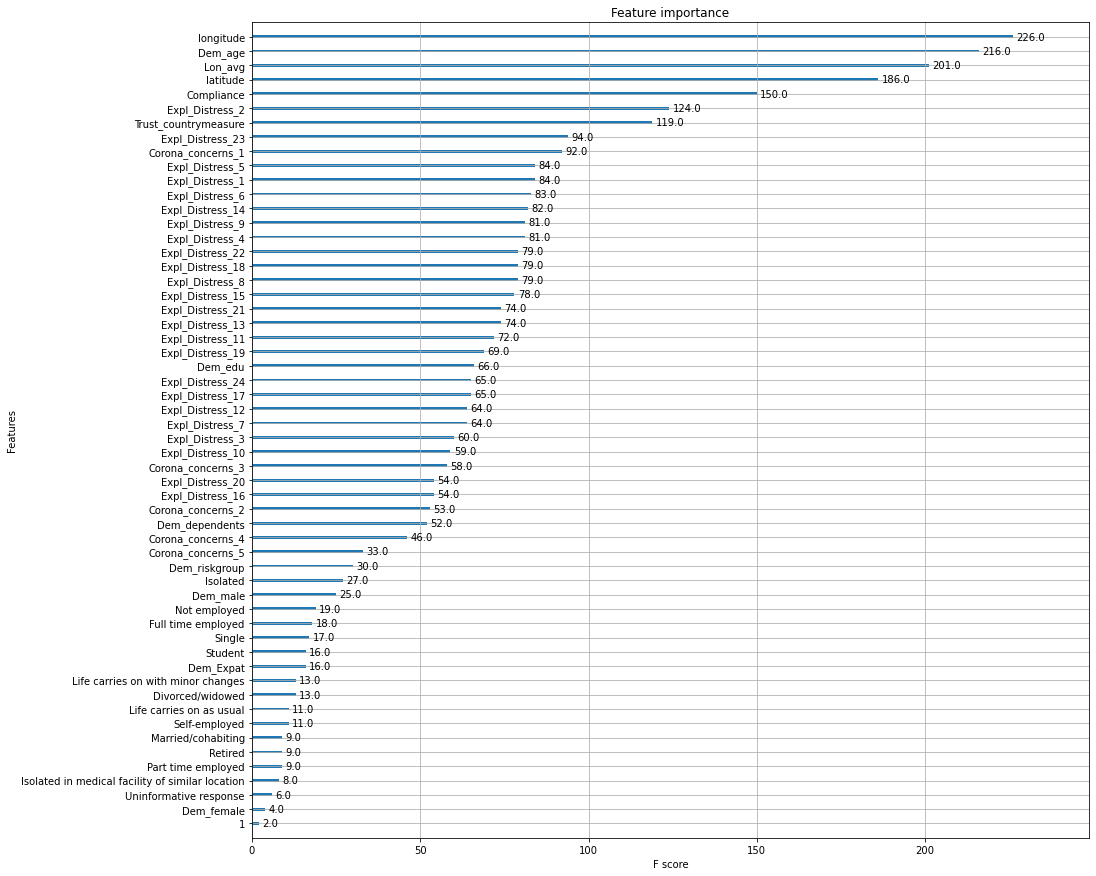

In [56]:
#plotting the important features
search.best_estimator_.get_booster().feature_names = feature_names
fig, ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(search.best_estimator_.get_booster(), ax=ax)
plt.show()